In [1]:
#Done
import os
import sys
from os import listdir
from os.path import isfile, join
import IPython.display as ipd
import librosa 
import librosa.display
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile as wav
import numpy as np
from timeit import default_timer as timer

In [2]:
def extract_ChromaSTFT(filename):
    audio, sample_rate=librosa.load(filename , res_type='kaiser_fast')
    chroma2=np.mean(librosa.feature.chroma_stft(y=audio , sr=sample_rate,n_chroma=100).T, axis=0)
    
    return chroma2

In [3]:
a=extract_ChromaSTFT("UrbanSound8K/audio/fold1/103074-7-0-1.wav")

In [4]:
metadata=pd.read_csv("UrbanSound8k/metadata/UrbanSound8k.csv")
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [6]:
fold_list = ['fold1', 'fold2', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10']

In [7]:
stacked_features = []
exceptions=0

start_time = timer()
for i in range(10):
    # get file names
    mypath = 'UrbanSound8K/audio/'+ fold_list[i] + '/'
    files = [mypath + f for f in listdir(mypath) if isfile(join(mypath, f))]
    
    for fn in files:
        try: # extract features
            mfccs = extract_ChromaSTFT(fn)
            features=np.reshape((mfccs),(20,5))
             
    
            
            
        except: # else exception (.ds_store files are part of mac file systems)
            print(fn)
            exceptions += 1
            continue
            
        l_row = metadata.loc[metadata['slice_file_name']==fn.split('/')[-1]].values.tolist()
        label = l_row[0][-1]
        fold = i+1
    
        stacked_features.append([features, features.shape, label, fold])
        
            #print(f,old_samplerate,ss)
        
print("Exceptions: ", exceptions)
end_time = timer()
print(print("time taken: {0} minutes {1:.1f} seconds".format((end_time - start_time)//60, (end_time - start_time)%60)))
print('Finished feature extraction from all folder')

C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


UrbanSound8K/audio/fold1/.DS_Store


C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
C:\Users\pc\Anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(


UrbanSound8K/audio/fold2/.DS_Store
UrbanSound8K/audio/fold3/.DS_Store
UrbanSound8K/audio/fold4/.DS_Store
UrbanSound8K/audio/fold5/.DS_Store
UrbanSound8K/audio/fold6/.DS_Store
UrbanSound8K/audio/fold7/.DS_Store
UrbanSound8K/audio/fold8/.DS_Store
UrbanSound8K/audio/fold9/.DS_Store
UrbanSound8K/audio/fold10/.DS_Store
Exceptions:  10
time taken: 30.0 minutes 6.3 seconds
None
Finished feature extraction from all folder


In [9]:
cols=['Stacked_Features', 'Matrix_Shape', 'Label', 'Fold']
Stacked_feature_pd=pd.DataFrame(data=stacked_features , columns=cols)
Stacked_feature_pd.head()

,Stacked_Features,Matrix_Shape,Label,Fold
0,"[[0.42396778, 0.43199593, 0.42883915, 0.421227...","(20, 5)",dog_bark,1
1,"[[0.34497955, 0.3550899, 0.349535, 0.3432681, ...","(20, 5)",dog_bark,1
2,"[[0.40839082, 0.40700686, 0.4022976, 0.3984764...","(20, 5)",dog_bark,1
3,"[[0.15034936, 0.12258983, 0.121807754, 0.13158...","(20, 5)",dog_bark,1
4,"[[0.6189676, 0.6135731, 0.5896414, 0.5715963, ...","(20, 5)",gun_shot,1


In [10]:
Stacked_feature_pd.Label.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

X = np.reshape(np.array(Stacked_feature_pd.Stacked_Features.tolist()), (8732, 100))
y = np.array(Stacked_feature_pd.Label.tolist())

le = LabelEncoder()
yy = le.fit_transform(y)
print(yy.shape)

(8732,)


In [12]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [13]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(scaler.fit_transform(X), yy, test_size=0.2,random_state=42)

In [14]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 100) (1747, 100) (6985,) (1747,)


In [15]:
print(x_train[0][:10])

[-0.4712008  -0.47772902 -0.49357232 -0.48903382 -0.26990673 -0.00913049
 -0.5105659  -0.6986932  -0.64139795 -0.5936249 ]


### Classification using KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_model=KNeighborsClassifier(n_neighbors=6) 

In [18]:
x_train=np.reshape(x_train,(6985,100))
x_test=np.reshape(x_test,(1747,100))
x_train.shape

(6985, 100)

In [19]:
start_time=timer()
knn_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 1.08 secs


In [20]:
print("Training accuracy is {:.2f}".format(knn_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(knn_model.score(x_test, y_test)))

Training accuracy is 0.71
Testing accuracy is 0.60


### Classification using Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000)

In [25]:
start = timer()
log.fit(x_train, y_train)
end = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end - start)//60 , (end - start)%60 ))

Total time required is 0.00 mins and 10.54 secs


In [26]:
print("Training accuracy is {:.2f}".format(log.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(log.score(x_test, y_test)))

Training accuracy is 0.47
Testing accuracy is 0.43


### Classification using Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree_model=DecisionTreeClassifier()

In [22]:
start_time=timer()
tree_model.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 3.17 secs


In [23]:
print("Training accuracy is {}".format(tree_model.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(tree_model.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.48


### Classification using SVM

In [27]:
from sklearn.svm import SVC

In [28]:
svc= SVC(kernel="rbf")

In [29]:
start_time=timer()
svc.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 16.02 secs


In [30]:
print("Training accuracy is {}".format(svc.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy is 0.6526843235504652
Testing accuracy is 0.61


**There is a clear sign of overfitting**

### Classification using Ensemble Classifiers

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rf=RandomForestClassifier(n_estimators=500)

In [33]:
start_time=timer()
rf.fit(x_train, y_train)
end_time=timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 1.00 mins and 34.02 secs


In [34]:
print("Training accuracy is {}".format(rf.score(x_train, y_train)))
print("Testing accuracy is {:.2f}".format(rf.score(x_test, y_test)))

Training accuracy is 1.0
Testing accuracy is 0.68


**Overfitting using RandomForestClassifiers**

In [35]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier

In [36]:
bg=BaggingClassifier()

In [37]:
start_time = timer()
bg.fit(x_train, y_train)
end_time = timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 22.45 secs


In [38]:
print("Training accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_train, y_train)) )
print("Testing accuracy of the Bagging Classifier {:.2f}".format(bg.score(x_test, y_test)) )

Training accuracy of the Bagging Classifier 0.99
Testing accuracy of the Bagging Classifier 0.60


In [39]:
ada= AdaBoostClassifier()

In [40]:
start_time= timer()
ada.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 0.00 mins and 13.98 secs


In [41]:
print("Training accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_train, y_train)) )
print("Testing accuracy of the AdaBoost Classifier {:.2f}".format(ada.score(x_test, y_test)) )

Training accuracy of the AdaBoost Classifier 0.29
Testing accuracy of the AdaBoost Classifier 0.29


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
gbc = GradientBoostingClassifier()
start_time= timer()
gbc.fit(x_train, y_train)
end_time= timer()
print("Total time required is {:.2f} mins and {:.2f} secs".format( (end_time-start_time)//60, (end_time-start_time)%60 ) )

Total time required is 10.00 mins and 26.88 secs


In [44]:
print("Training accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_train, y_train)) )
print("Testing accuracy of the Gradient Boosting Classifier {:.2f}".format(gbc.score(x_test, y_test)) )

Training accuracy of the Gradient Boosting Classifier 0.81
Testing accuracy of the Gradient Boosting Classifier 0.59


In [45]:
from sklearn.linear_model import LogisticRegression
log =LogisticRegression(max_iter=1000)

In [46]:
log.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
print("Training accuracy of the Gradient Boosting Classifier {:.2f}".format(log.score(x_train, y_train)) )
print("Testing accuracy of the Gradient Boosting Classifier {:.2f}".format(log.score(x_test, y_test)) )

Training accuracy of the Gradient Boosting Classifier 0.47
Testing accuracy of the Gradient Boosting Classifier 0.43


In [48]:
### Unsupervised Learning 
from sklearn.cluster import KMeans
kms= KMeans(n_clusters=10)

In [49]:
kms.fit(x_train)

KMeans(n_clusters=10)

In [50]:
pd.crosstab(kms.predict(x_train), y_train)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,89,34,223,229,265,74,16,89,107,201
1,48,0,3,8,10,100,2,74,1,16
2,120,16,148,120,137,153,165,192,45,70
3,13,3,8,8,7,109,0,37,1,7
4,40,198,61,51,74,6,0,13,310,126
5,96,1,6,7,8,49,0,17,3,3
6,71,96,238,290,220,17,5,78,212,323
7,40,1,11,11,36,44,1,101,12,11
8,125,3,32,20,1,132,51,18,1,15


In [52]:
### Visualizing the clusters formed with the MFCC features 
from sklearn.decomposition import PCA

In [53]:
cols=["mfcc_"+str(i) for i in range(1,101)]

In [54]:
X.shape

(8732, 100)

In [55]:
mfcc_pd=pd.DataFrame(data=scaler.fit_transform(X), columns=cols)
mfcc_pd["labels"]=y
mfcc_pd.head()


,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,...,mfcc_92,mfcc_93,mfcc_94,mfcc_95,mfcc_96,mfcc_97,mfcc_98,mfcc_99,mfcc_100,labels
0,0.581952,0.635999,0.629815,0.570352,0.545791,0.523238,0.469983,0.474081,0.514800,0.526253,...,0.306493,0.349372,0.428287,0.542064,0.588403,0.609580,0.599660,0.588420,0.562294,dog_bark
1,0.146048,0.208236,0.187547,0.139793,0.120397,0.056274,-0.042882,-0.094753,-0.131763,-0.188706,...,-0.031565,-0.044963,-0.031577,-0.024267,-0.037287,-0.033803,0.001600,0.030521,0.065951,dog_bark
2,0.495989,0.497006,0.481797,0.444702,0.422776,0.439485,0.468214,0.520461,0.607834,0.724469,...,0.170059,0.200075,0.253947,0.322911,0.379596,0.436051,0.488507,0.521436,0.507510,dog_bark
3,-0.928038,-1.084966,-1.082456,-1.029322,-1.030590,-1.009493,-0.980098,-1.029515,-0.997184,-0.967021,...,-0.811816,-1.071848,-1.063925,-0.968403,-0.829528,-0.825974,-0.842921,-0.895963,-0.851571,dog_bark
4,1.658077,1.645958,1.526587,1.400824,1.367351,1.326218,1.274143,1.243666,1.194273,1.056654,...,1.331622,1.382340,1.433325,1.497365,1.531787,1.613655,1.707781,1.763683,1.709934,gun_shot


In [56]:
pca=PCA(n_components=2)

In [57]:
pcas=pca.fit_transform(mfcc_pd.drop("labels", axis=1))

In [58]:
pca_cols=["pca_"+str(i) for i in range(1,3)]

In [59]:
main_df=pd.DataFrame(data=pcas, columns=pca_cols)
main_df["labels"]=y
main_df.head()

,pca_1,pca_2,labels
0,2.885179,0.330299,dog_bark
1,-0.479294,-0.288800,dog_bark
2,6.707886,1.244118,dog_bark
3,-5.133660,0.187527,dog_bark
4,8.662486,-3.330480,gun_shot


In [60]:
main_df.labels.unique()

array(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'], dtype=object)

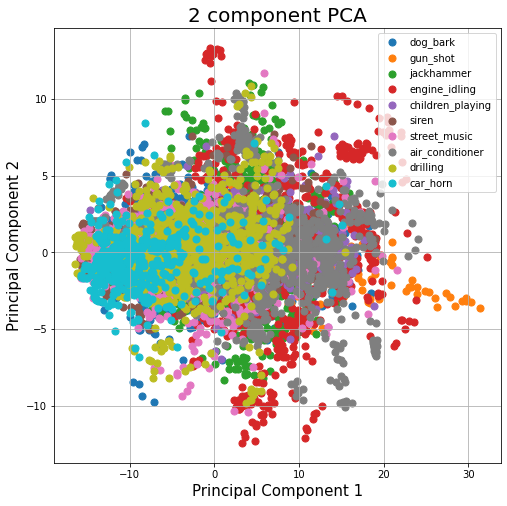

In [63]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1, 1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
for target, color in zip(targets,colors):
    indicesToKeep = main_df['labels']== target
    #print(indicesToKeep[:10])
    ax.scatter(list(main_df.loc[indicesToKeep, 'pca_1'])
               ,list(main_df.loc[indicesToKeep, 'pca_2'])
               , c = color
               , s = 50)
ax.legend(['dog_bark', 'gun_shot', 'jackhammer', 'engine_idling',
       'children_playing', 'siren', 'street_music', 'air_conditioner',
       'drilling', 'car_horn'])
ax.grid()

In [64]:
pcas=pca.explained_variance_ratio_
print("Total information ", sum(pcas))

Total information  0.7414759695529938


In [65]:
x_train, x_test, y_train, y_test = train_test_split(main_df.drop("labels", axis=1), main_df["labels"], test_size=0.2, random_state=42)

In [66]:
print(x_train.shape, x_test.shape, y_train.shape , y_test.shape)

(6985, 2) (1747, 2) (6985,) (1747,)


In [67]:
svc_2=SVC()
svc_2.fit(x_train, y_train)

SVC()

In [68]:
svc_2.score(x_test, y_test)

0.2976531196336577

In [69]:
x_test.shape[1]

2

In [70]:
# Predictions using SVC on 50 features
predictions=svc_2.predict(x_test)


In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
 mat=confusion_matrix(predictions, y_test)

In [73]:
def acc_per_class(np_probs_array):    
    accs = []
    for idx in range(0, np_probs_array.shape[0]):
        correct = np_probs_array[idx][idx].astype(int)
        total = np_probs_array[idx].sum().astype(int)
        acc = (correct / total) * 100
        accs.append(acc)
    return accs

In [74]:
accuracies=acc_per_class(mat)
labels = [
        'Air Conditioner',
        'Car Horn',
        'Children Playing',
        'Dog bark',
        'Drilling',
        'Engine Idling',
        'Gun Shot',
        'Jackhammer',
        'Siren',
        'Street Music'
    ]

pd.DataFrame({'CLASS':labels, 'ACCURACY': accuracies}).sort_values(by='ACCURACY', ascending=False)

,CLASS,ACCURACY
1,Car Horn,100.000000
5,Engine Idling,59.848485
6,Gun Shot,50.000000
8,Siren,42.134831
0,Air Conditioner,40.298507
3,Dog bark,30.379747
7,Jackhammer,25.059666
9,Street Music,23.821990
4,Drilling,20.155039
2,Children Playing,15.909091
